In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-images/child-girl-playing-outdoors-cute-little-girl-play-in-the-garden-pretty-baby-girl-kid-eating-ice-cream-photo.jpg
/kaggle/input/test-images/pexels-photo-6696645.jpeg
/kaggle/input/test-images/istockphoto-1388644810-612x612.jpg
/kaggle/input/test-images/KOA_Nassau_2697x1517.jpg
/kaggle/input/test-images/Hyundai-Creta-180120241405.jpg
/kaggle/input/dataset-genai/imagic-editing.github.io-main/index.html
/kaggle/input/dataset-genai/imagic-editing.github.io-main/tedbench/input_list.json
/kaggle/input/dataset-genai/imagic-editing.github.io-main/tedbench/imagic/new_cat_3.jpeg-A_photo_of_a_cat_from_behind.png
/kaggle/input/dataset-genai/imagic-editing.github.io-main/tedbench/imagic/pizza1.png-Pizza_with_pineapple.png
/kaggle/input/dataset-genai/imagic-editing.github.io-main/tedbench/imagic/door.jpeg-A_photo_of_an_open_door.png
/kaggle/input/dataset-genai/imagic-editing.github.io-main/tedbench/imagic/red_car.jpeg-A_photo_of_a_car_in_Manhattan.png
/kaggle/input/dataset-ge

In [2]:
!pip install diffusers transformers torch accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 33.1 MB/s eta 0:00:0000:0100:01


In [10]:
## Importing image and preprocessing

from PIL import Image
from torchvision import transforms

# Load the input image
image_path = "/kaggle/input/dataset-genai/imagic-editing.github.io-main/tedbench/originals/open_book.jpeg"  # Replace with your image path
image = Image.open(image_path)

# Preprocess the image (resizing and normalization)
preprocess = transforms.Compose([
    transforms.Resize((256, 256)),  # Adjust size based on model input
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # Normalize image to [-1, 1]
])
x = preprocess(image).unsqueeze(0)  # Add batch dimension
x.requires_grad_()  # Enable gradient calculation for the input image

tensor([[[[-0.1529, -0.1686, -0.1922,  ..., -0.0745, -0.1608, -0.2941],
          [-0.1216, -0.1294, -0.1294,  ...,  0.0431, -0.0745, -0.2863],
          [-0.1137, -0.1216, -0.1373,  ...,  0.0353, -0.0510, -0.2314],
          ...,
          [-0.6471, -0.5843, -0.5373,  ..., -0.7098, -0.7020, -0.7020],
          [-0.7255, -0.6157, -0.5216,  ..., -0.7098, -0.7098, -0.7098],
          [-0.7569, -0.6863, -0.5529,  ..., -0.7098, -0.7176, -0.7176]],

         [[-0.2627, -0.2784, -0.3020,  ..., -0.1922, -0.2941, -0.4353],
          [-0.2314, -0.2392, -0.2392,  ..., -0.0431, -0.1765, -0.3961],
          [-0.2235, -0.2314, -0.2471,  ..., -0.0431, -0.1451, -0.3490],
          ...,
          [-0.7176, -0.6549, -0.6314,  ..., -0.7804, -0.7725, -0.7725],
          [-0.7725, -0.6706, -0.6000,  ..., -0.7804, -0.7804, -0.7804],
          [-0.7882, -0.7255, -0.6157,  ..., -0.7804, -0.7882, -0.7882]],

         [[-0.3490, -0.3647, -0.3882,  ..., -0.2863, -0.3961, -0.5451],
          [-0.3176, -0.3255, -

I/P IMAGE


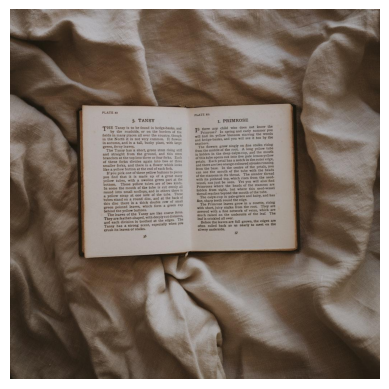

In [11]:
## I/p image

import matplotlib.pyplot as plt

print('I/P IMAGE')
# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes for better viewing
plt.show()

In [12]:
## Text embedding optimization

from transformers import CLIPTokenizer, CLIPTextModel

tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")
text_encoder = CLIPTextModel.from_pretrained("openai/clip-vit-base-patch32")

# Encode your text prompt
text = "A closed book lying on a brown cloth"
#text_inputs = tokenizer(text, return_tensors="pt")
#text_embedding = pipeline._encode_prompt(prompt=text, device=pipeline.device, num_images_per_prompt=1, do_classifier_free_guidance=False)

# Encode the text prompt
prompt_embeds_tuple = pipeline.encode_prompt(prompt=text, device=pipeline.device, num_images_per_prompt=1, do_classifier_free_guidance=False)

# Extract the correct prompt embedding from the tuple
prompt_embeds = prompt_embeds_tuple[0]  # Use the actual prompt embedding

In [15]:
from diffusers import StableDiffusionPipeline
from transformers import CLIPTokenizer

# Load the Stable Diffusion pipeline
pipeline = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
pipeline = pipeline.to("cuda")  # Move to GPU if available

# Define your text prompt
text = "A closed book lying on a brown cloth"

# Encode the text prompt
prompt_embeds_tuple = pipeline.encode_prompt(
    prompt=text,
    device=pipeline.device,
    num_images_per_prompt=1,
    do_classifier_free_guidance=False
)

# Extract the correct prompt embedding from the tuple
prompt_embeds = prompt_embeds_tuple[0]
print(prompt_embeds)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

tensor([[[-0.3884,  0.0229, -0.0522,  ..., -0.4899, -0.3066,  0.0675],
         [ 0.0290, -1.3258,  0.3085,  ..., -0.5257,  0.9768,  0.6652],
         [-0.1448, -0.4500,  1.4556,  ...,  0.1318,  0.5387,  0.1141],
         ...,
         [ 1.4659, -0.3166,  0.4551,  ..., -1.8564,  0.4911, -0.1320],
         [ 1.4546, -0.3279,  0.4294,  ..., -1.8112,  0.5014, -0.1574],
         [ 1.5051, -0.2926,  0.4872,  ..., -1.7779,  0.5547, -0.1529]]],
       device='cuda:0', grad_fn=<ViewBackward0>)


In [9]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


Using device: cuda:1


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Fine-tuning Progress:   0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

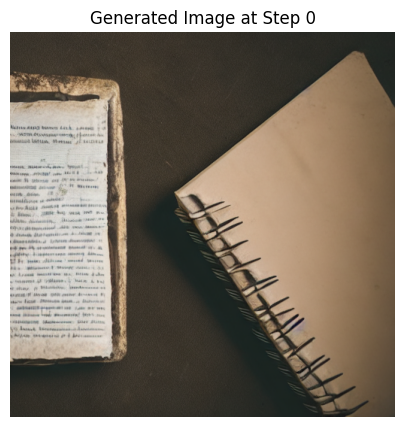

Fine-tuning Progress:   2%|▏         | 1/50 [00:27<22:18, 27.31s/it]

Step 0: Loss = 0.3442489504814148


  0%|          | 0/50 [00:00<?, ?it/s]

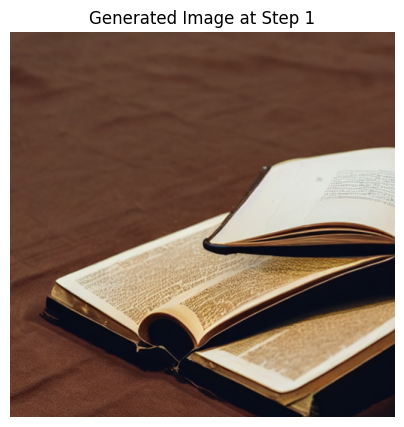

Fine-tuning Progress:   4%|▍         | 2/50 [00:55<22:14, 27.80s/it]

Step 1: Loss = 0.2994418740272522


  0%|          | 0/50 [00:00<?, ?it/s]

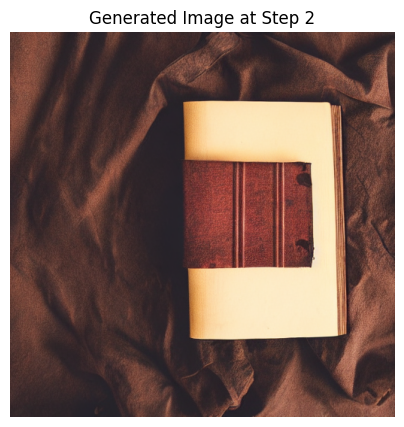

Fine-tuning Progress:   6%|▌         | 3/50 [01:22<21:25, 27.35s/it]

Step 2: Loss = 0.34766870737075806


  0%|          | 0/50 [00:00<?, ?it/s]

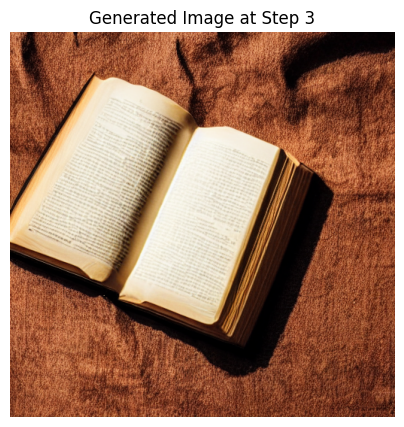

Fine-tuning Progress:   8%|▊         | 4/50 [01:49<20:55, 27.30s/it]

Step 3: Loss = 0.3522799611091614


  0%|          | 0/50 [00:00<?, ?it/s]

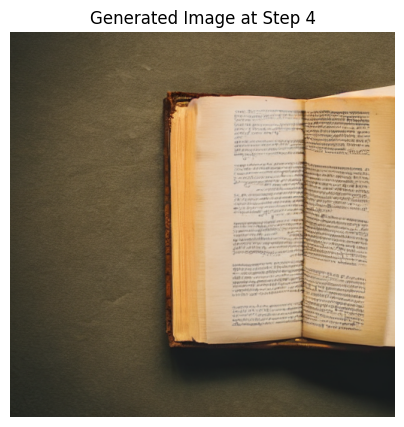

Fine-tuning Progress:  10%|█         | 5/50 [02:17<20:32, 27.39s/it]

Step 4: Loss = 0.23085753619670868


  0%|          | 0/50 [00:00<?, ?it/s]

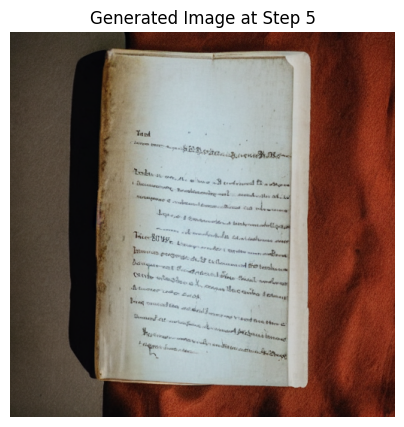

Fine-tuning Progress:  12%|█▏        | 6/50 [02:44<20:01, 27.30s/it]

Step 5: Loss = 0.2546161711215973


  0%|          | 0/50 [00:00<?, ?it/s]

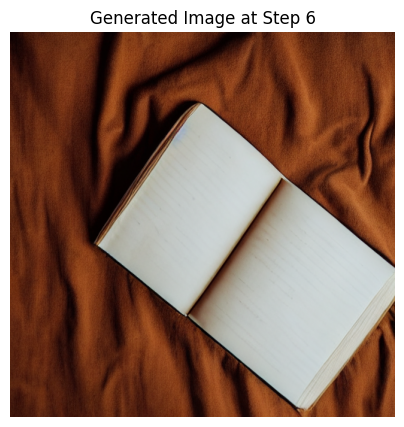

Fine-tuning Progress:  14%|█▍        | 7/50 [03:11<19:34, 27.31s/it]

Step 6: Loss = 0.33439239859580994


  0%|          | 0/50 [00:00<?, ?it/s]

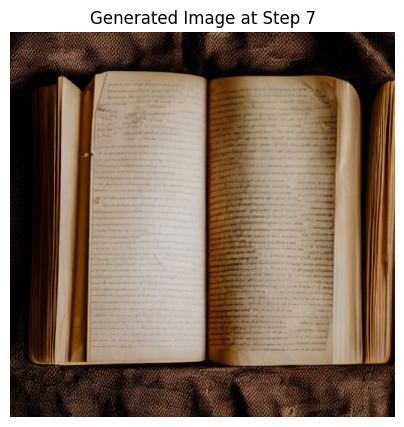

Fine-tuning Progress:  16%|█▌        | 8/50 [03:38<19:08, 27.35s/it]

Step 7: Loss = 0.25110289454460144


  0%|          | 0/50 [00:00<?, ?it/s]

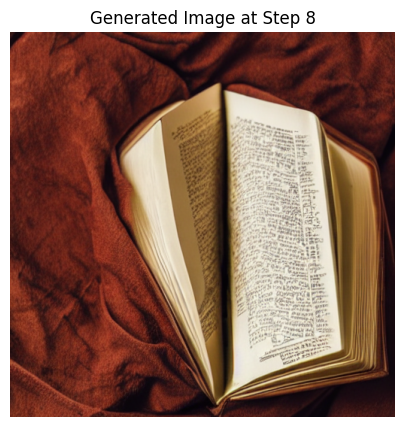

Fine-tuning Progress:  18%|█▊        | 9/50 [04:06<18:40, 27.32s/it]

Step 8: Loss = 0.326806902885437


  0%|          | 0/50 [00:00<?, ?it/s]

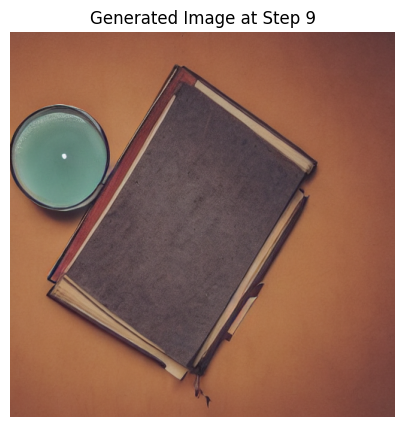

Fine-tuning Progress:  20%|██        | 10/50 [04:33<18:10, 27.27s/it]

Step 9: Loss = 0.18929176032543182


  0%|          | 0/50 [00:00<?, ?it/s]

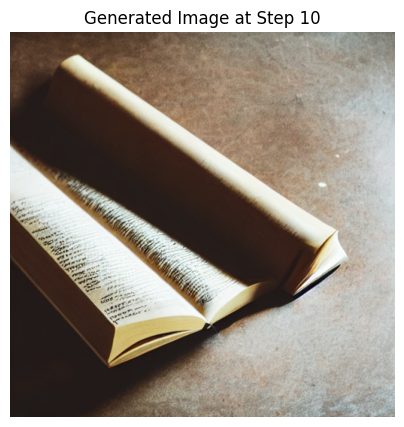

Fine-tuning Progress:  22%|██▏       | 11/50 [05:00<17:42, 27.24s/it]

Step 10: Loss = 0.4592319130897522


  0%|          | 0/50 [00:00<?, ?it/s]

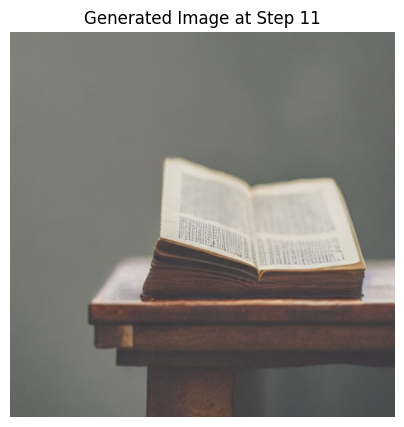

Fine-tuning Progress:  24%|██▍       | 12/50 [05:27<17:14, 27.23s/it]

Step 11: Loss = 0.18123698234558105


  0%|          | 0/50 [00:00<?, ?it/s]

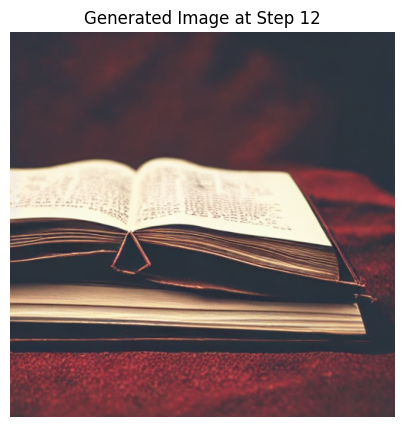

Fine-tuning Progress:  26%|██▌       | 13/50 [05:54<16:47, 27.22s/it]

Step 12: Loss = 0.2769004702568054


  0%|          | 0/50 [00:00<?, ?it/s]

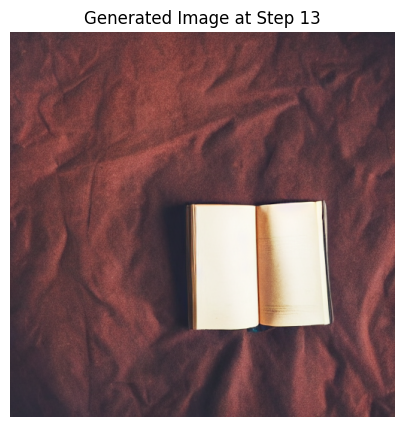

Fine-tuning Progress:  28%|██▊       | 14/50 [06:22<16:20, 27.23s/it]

Step 13: Loss = 0.23830446600914001


  0%|          | 0/50 [00:00<?, ?it/s]

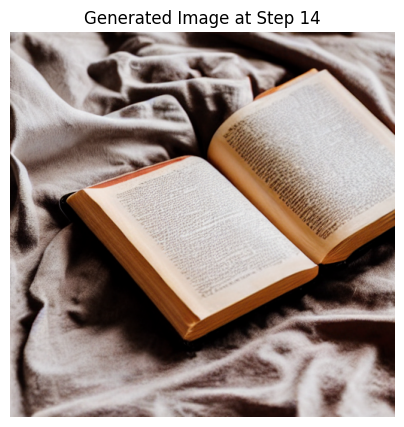

Fine-tuning Progress:  30%|███       | 15/50 [06:49<15:54, 27.26s/it]

Step 14: Loss = 0.5030442476272583


  0%|          | 0/50 [00:00<?, ?it/s]

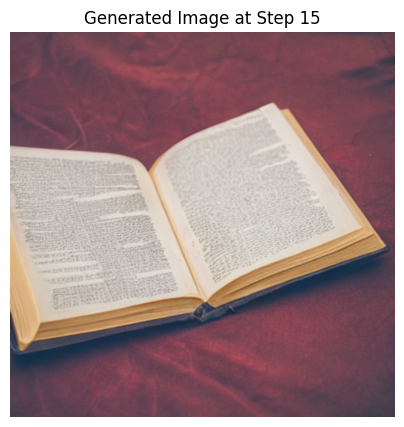

Fine-tuning Progress:  32%|███▏      | 16/50 [07:16<15:27, 27.28s/it]

Step 15: Loss = 0.24397651851177216


  0%|          | 0/50 [00:00<?, ?it/s]

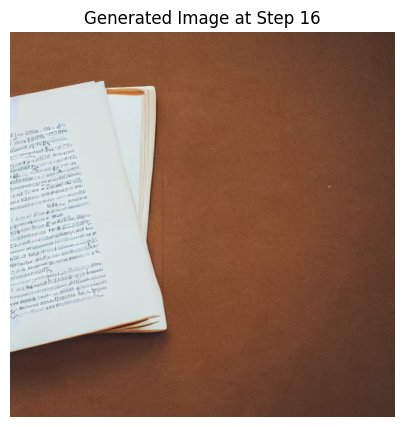

Fine-tuning Progress:  34%|███▍      | 17/50 [07:44<15:00, 27.30s/it]

Step 16: Loss = 0.3514546751976013


  0%|          | 0/50 [00:00<?, ?it/s]

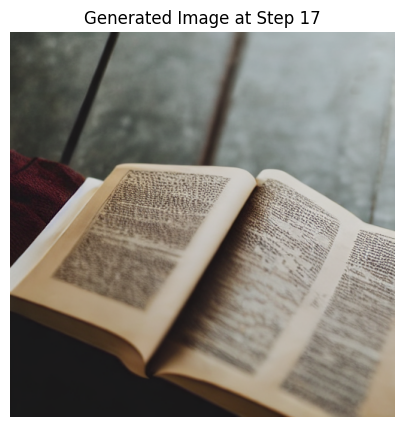

Fine-tuning Progress:  36%|███▌      | 18/50 [08:11<14:34, 27.31s/it]

Step 17: Loss = 0.2551867961883545


  0%|          | 0/50 [00:00<?, ?it/s]

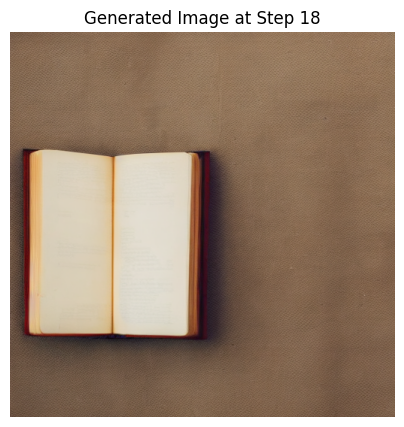

Fine-tuning Progress:  38%|███▊      | 19/50 [08:38<14:07, 27.34s/it]

Step 18: Loss = 0.22275397181510925


  0%|          | 0/50 [00:00<?, ?it/s]

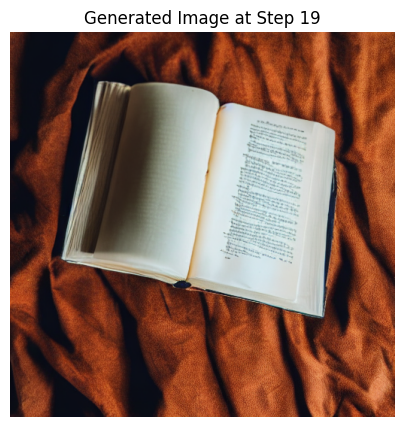

Fine-tuning Progress:  40%|████      | 20/50 [09:06<13:40, 27.36s/it]

Step 19: Loss = 0.32043397426605225


  0%|          | 0/50 [00:00<?, ?it/s]

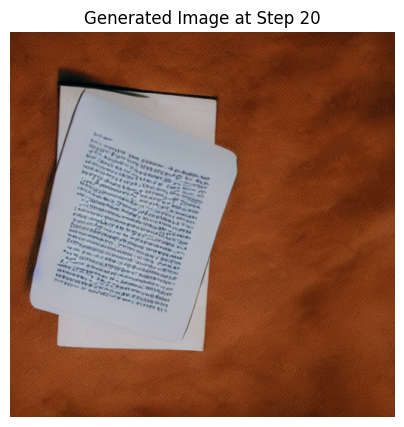

Fine-tuning Progress:  42%|████▏     | 21/50 [09:33<13:12, 27.34s/it]

Step 20: Loss = 0.2501084804534912


  0%|          | 0/50 [00:00<?, ?it/s]

Fine-tuning Progress:  42%|████▏     | 21/50 [09:34<13:12, 27.34s/it]


KeyboardInterrupt: 

In [17]:
import torch
from diffusers import StableDiffusionPipeline
from torchvision import transforms
import matplotlib.pyplot as plt
from tqdm import tqdm

# Check for GPU availability
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model_id = "CompVis/stable-diffusion-v1-4"
pipeline = StableDiffusionPipeline.from_pretrained(model_id).to(device)  # Move pipeline to GPU

# Load and fine-tune the model on your specific image
pipeline.text_encoder.train()  # Enable training
optimizer = torch.optim.AdamW(pipeline.text_encoder.parameters(), lr=1e-3)

loss_fn = torch.nn.MSELoss()
accumulate_steps = 1

# Train on the input image (x) and the optimized text embedding
for step in tqdm(range(50), desc="Fine-tuning Progress"):
    optimizer.zero_grad()

    # Generate the image using the prompt embedding
    generated_images = pipeline(prompt_embeds=prompt_embeds, guidance_scale=7.5).images

    # Convert generated image to tensor and normalize
    generated_image_tensor = transforms.ToTensor()(generated_images[0]).unsqueeze(0).to(device)
    generated_image_tensor = transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])(generated_image_tensor)

    # Ensure the generated image tensor retains gradients
    generated_image_tensor = transforms.Resize((256, 256))(generated_image_tensor)
    generated_image_tensor.requires_grad_()

    # Compute loss (between generated image and input image)
    loss = loss_fn(generated_image_tensor, x.to(device)) / accumulate_steps

    # Backpropagation and optimization
    loss.backward()

    if step % accumulate_steps == 0:
        optimizer.step()
        optimizer.zero_grad()
    plt.figure(figsize=(5, 5))
    plt.imshow(generated_images[0])
    plt.title(f"Generated Image at Step {step}")
    plt.axis('off')
    plt.show()

    print(f"Step {step}: Loss = {loss.item()}")
